# Part II - San Francisco Bay Ford GoBike Services
## by Excellent Ikeakanam


## Investigation Overview

>The goal of this investigation and analysis is to enable the ford GoBike services know where and how they should channel more of their marketing strategies to.
1. What is the count of trips based on user type?
2. What days of the week have the highest number of trips?
3. What hour of the day have the highest number of trips?
4. What is the duration of trips from each station?



## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The Ford GoBike services is a bike sharing transportation provided by Ford that is easy to use, enjoyable and convenient. There are several bike stations, both start stations and end stations. People use bike sharing for many different reasons, such as commuting to work or school, running errands, and getting to and from appointments.The dataset contains the 2019 records which has 183,412 records and 16 features. The dataset contains details of stations, duration of rides, gender, and types of users. The service has two types of users which are Customers and Subscribers. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

## What is the count of trips based on user type?

> It was observed that the people users that are subscribed to the goBike services uses it more than the regular customers. This makes sense, as this is a good thing for the ford goBike company. It also shows that they have more subscribers than regular customers, this may mean that the subscription price is more reasonable that paying for trips everytime. For instance, people would prefer paying a subscription fee of let's say 15 dollars per month, than paying 2 or 3 dollars per trip.

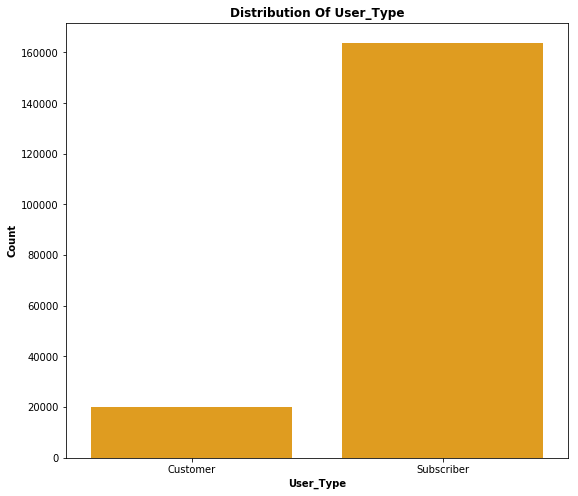

In [4]:
ford_clean = ford_df.copy()

#start_time and end_time variables to datetime datatype
ford_clean['start_time'] = pd.to_datetime(ford_clean['start_time'])
ford_clean['end_time'] = pd.to_datetime(ford_clean['end_time'])

#split the time variables into hour and day of the week
#hour of the day
ford_clean['start_hour'] = ford_clean['start_time'].apply(lambda time: time.hour)
ford_clean['period_of_day'] = 'morning'
ford_clean['period_of_day'][(ford_clean['start_hour'] >= 12) & (ford_clean['start_hour'] <= 17)] = 'afternoon'
ford_clean['period_of_day'][(ford_clean['start_hour'] >= 18) & (ford_clean['start_hour'] <= 23)] = 'night'

#day of the week
ford_clean['start_weekday_num'] = ford_clean['start_time'].apply(lambda time: time.dayofweek)
day_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
ford_clean['start_weekday_name'] = ford_clean['start_weekday_num'].map(day_map)

#user-defined function for countpot
def countplot (ford_clean, column, order = None, color = None):
    plt.figure(figsize=[9,8])
    sb.countplot(data = ford_clean, x=column, color = color, order=order);
    plt.title(f'''Distribution of {column}'''.title(), fontsize=12, weight ='bold')
    plt.xlabel(column.title(),fontsize=10, weight='bold')
    plt.ylabel('Count'.title(),fontsize=10,weight='bold')

countplot(ford_clean, 'user_type', color = 'orange')

## What days of the week have the highest number of trips?

> From the plot below,riders take trips more on Thursdays, followed by Tuesdays, Fridays and Wednesdays. The low count of trips on Saturdays and sundays make sense because it is weekends, and that is when people rest. During the week, people go to work or travel, or engage in one thing or the other, and then prefer to rest over the weekend. For Thursdays to be high, it is quite possible that so many people tend to have engagements that day, or there might be a discount price for trips that day

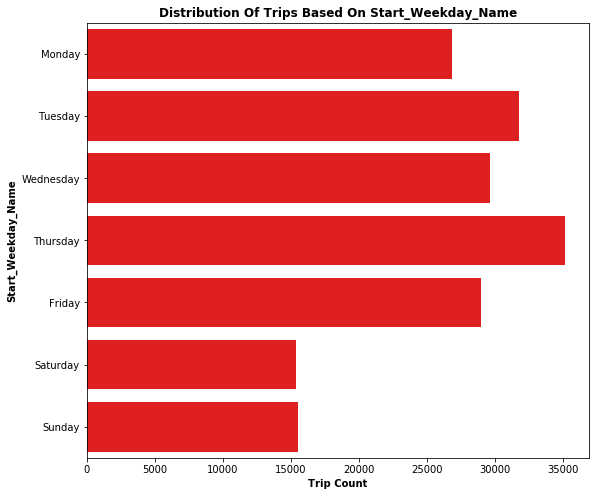

In [5]:
#user-defined function for horizontal countplot
def countplot2(ford_clean, column, order = None, color=None):
    plt.figure(figsize=[9,8])
    sb.countplot(data = ford_clean, y=column, color = color, order=order);
    plt.title(f'''Distribution of trips based on {column}'''.title(), fontsize=12, weight ='bold')
    plt.ylabel(column.title(),fontsize=10, weight='bold')
    plt.xlabel('Trip Count'.title(),fontsize=10,weight='bold')
    
#day of the week riders take trips more
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day_order = pd.api.types.CategoricalDtype(ordered=True, categories=week_day)
ford_clean['start_weekday_name'] = ford_clean['start_weekday_name'].astype(week_day_order)

countplot2(ford_clean, 'start_weekday_name', color = 'red')

## What hour of the day has the highest number of trips?

> It can be observed from the chart that people tend to take trips in the morning or in the afternoon, rather than at night. This makes sense because it is safer to take trips during the day time that at night fall, and also for people that go to work in the morning. Also, I can also say that maybe some of the riders work at night, because the count of people that ride at night is not so little. 



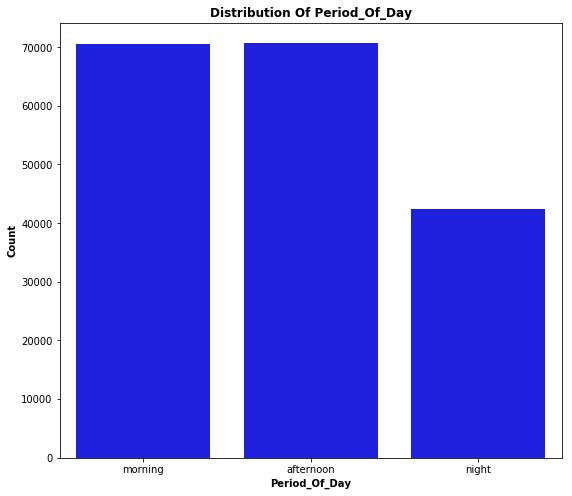

In [6]:
#hour of the day that has more trips    
day_hour = ['morning', 'afternoon', 'night']
day_hour_order = pd.api.types.CategoricalDtype(ordered=True, categories=day_hour)
ford_clean['period_of_day'] = ford_clean['period_of_day'].astype(day_hour_order)

countplot(ford_clean, 'period_of_day', color = 'blue')

## What is the duration of trips from each station?
> San Francisco Ferry Building and Powell St Bart station at 4th street have the highest duration of trips, which is over 800 secs and if converted to minutes is about 14 minutes. This means that rides taken from these stations takes about 14 minutes to get to their destinations. San Francisco Caltrain station has the shortest duration of trip which is about 600 secs, when converted is about 10 minutes there about. Rides from these station takes a min of 10 minutes, pending on the destination station. 

Text(0.5,1,'Distribution of trips durations in Top 10 stations')

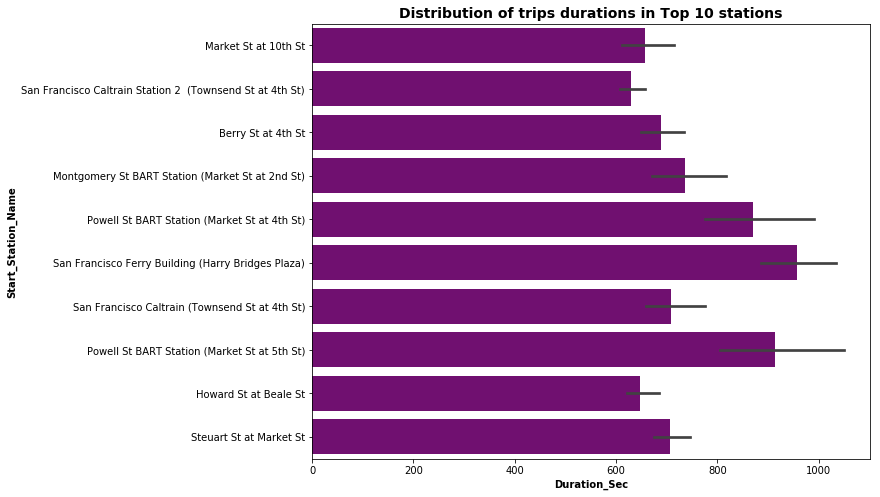

In [7]:
#barplot showing the duration of trips in the top 10 stations
#user-defined function for barplots
def barplots(ford_clean, column, x=None, color=None, order=None, hue=None):
    plt.figure(figsize=[10,8])
    sb.barplot(data = ford_clean, y=column, x=x, order=order, color=color, hue=hue);
    plt.ylabel(column.title(),fontsize=10,weight='bold')
    plt.xlabel(x.title(),fontsize=10,weight='bold')

top_start_stations = ford_clean['start_station_name'].value_counts().index[:10]
barplots(ford_clean, 'start_station_name', x = 'duration_sec', color = 'purple', order=top_start_stations)
plt.title('Distribution of trips durations in Top 10 stations', fontsize=14,weight='bold')

In [8]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 375949 bytes to Part_II_slide_deck.slides.html
